In [ ]:
uri = 'https://gist.githubusercontent.com/guilhermesilveira/1b7d5475863c15f484ac495bd70975cf/raw/16aff7a0aee67e7c100a2a48b676a2d2d142f646/projects.csv'
import pandas as pd
data = pd.read_csv(uri)

In [ ]:
map = {
    'unfinished':'nao_finalizado',
    'expected_hours':'horas_esperadas',
    'price':'preco'
}
data = data.rename(columns = map)

In [ ]:
trocar = {
    0:1,
    1:0
}
data['finalizado'] = data.nao_finalizado.map(trocar)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


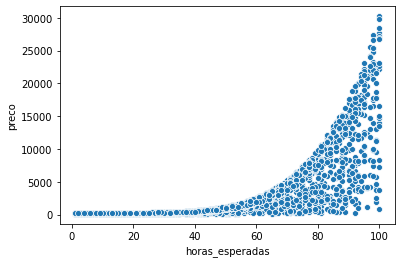

In [ ]:
!pip install seaborn==0.9.0
import seaborn as sns
sns.scatterplot(x="horas_esperadas", y="preco", data=data)

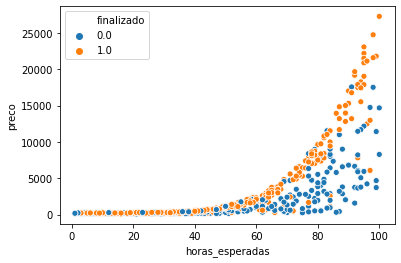

In [ ]:
sns.scatterplot(x="horas_esperadas", y="preco", hue=teste_y,  data=data)

In [ ]:
x = data[['horas_esperadas', 'preco']]
y = data['finalizado']

In [ ]:
from sklearn.model_selection import train_test_split

In [78]:
SEED = 5
np.random.seed(SEED)

In [113]:
test = train_test_split(x, y, test_size=0.25, stratify=y)
print(len(test))
treino_x = test[0]
teste_x = test[1]
treino_y = test[2]
teste_y = test[3]

from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(treino_x)
ss.fit(teste_x)
treino_x = ss.transform(treino_x)
teste_x = ss.transform(teste_x)

4


In [127]:
from sklearn.svm import SVC
model = SVC()
model.fit(treino_x, treino_y)
result = model.predict(teste_x)
from sklearn.metrics import accuracy_score
print(f"{accuracy_score(teste_y, result) * 100}%")

64.25925925925927%


In [115]:
print(treino_y.value_counts(), teste_y.value_counts(), sep="\n")

1    850
0    767
Name: finalizado, dtype: int64
1    284
0    256
Name: finalizado, dtype: int64


In [125]:
x_min = data.horas_esperadas.min()
x_max = data.horas_esperadas.max()
y_min = data.preco.min()
y_max = data.preco.max()
print(f"X Min: {x_min}, X Max: {x_max}")
print(f"Y Min:{y_min}, Y Max: {y_max}")

X Min: 1, X Max: 100
Y Min:100, Y Max: 30223


In [ ]:
import numpy as np
baseline = np.ones(540)

In [75]:
pixels = 100
x_index = np.arange(x_min, x_max, (x_max - x_min) / pixels)
y_index = np.arange(y_min, y_max, (y_max - y_min) / pixels)

In [74]:
xx, yy = np.meshgrid(x_index, y_index)
pontos = np.c_[xx.ravel(), yy.ravel()]
pontos

array([[1.000000e+00, 1.000000e+02],
       [1.990000e+00, 1.000000e+02],
       [2.980000e+00, 1.000000e+02],
       ...,
       [9.703000e+01, 2.992177e+04],
       [9.802000e+01, 2.992177e+04],
       [9.901000e+01, 2.992177e+04]])

In [76]:
Z = model.predict(pontos)
Z = Z.reshape(xx.shape)
Z

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

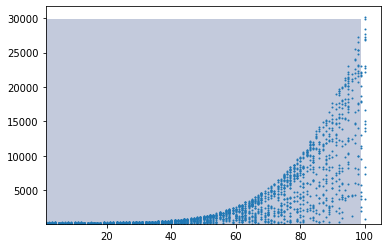

In [120]:
import matplotlib.pyplot as plt
plt.contourf(xx, yy, Z, alpha=0.3)
plt.scatter(data.horas_esperadas, data.preco, s=1)